# Data Manipulation with Pandas

![Pandas](https://pandas.pydata.org/_static/pandas_logo.png)

Pandas is a very powerful Python library in data manipulation and analysis. It has the following features

- Powerful indexing,
- Missing / NA data handling,
- group by and joining,
- time series manipulations etc

# Series
`Series` is a 1-D array. But it is much powerful than python native array. Now let's import `pandas` and play around Series. 

In [1]:
import pandas as pd

To create a series from python array, we call `pd.Series` and put array as the first parameter.

In [4]:
prices = pd.Series([100, 90, 200, 30])
prices

0    100
1     90
2    200
3     30
dtype: int64

Now, we have a series of 4 elements.

Filtering elements are easy, let's try the following.

In [6]:
prices[prices > 50]

0    100
1     90
2    200
dtype: int64

In [37]:
prices > 50

0     True
1     True
2     True
3    False
dtype: bool

In [40]:
prices[[True, False, True, False]]

0    100
2    200
dtype: int64

In [14]:
prices.size

4

In [26]:
prices[prices > 50].index.tolist()

[0, 1, 2]

In [15]:
prices[0:2]

0    100
1     90
dtype: int64

# Simple Statistics
We always need to check the statistics of a number array. `pandas` provides many. 

In [16]:
prices.describe()

count      4.000000
mean     105.000000
std       70.474582
min       30.000000
25%       75.000000
50%       95.000000
75%      125.000000
max      200.000000
dtype: float64

In [8]:
prices.mean()

105.0

In [9]:
prices.max()

200

In [10]:
prices.min()

30

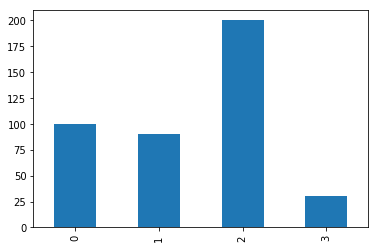

In [27]:
prices.plot.bar()

# Index
By default, a `pandas` series is from 0..N - 1. But we may want to have some other indices.

In [33]:
choices = pd.Series(['Ann', 'Bonnie', 'Claire', 'Dice', 'Egg'], index=['A', 'B', 'C','D','E'])
choices

A       Ann
B    Bonnie
C    Claire
D      Dice
E       Egg
dtype: object

In [34]:
choices.loc['A']

'Ann'

In [35]:
choices.iloc[0]

'Ann'

In [36]:
choices.describe()

count        5
unique       5
top       Dice
freq         1
dtype: object

But character index is not always something we want, now let see if we can use `datetime` as index.

In [51]:
from datetime import datetime, timedelta
start_date = datetime(2018, 4, 1, 0, 0, 0)
dates = [start_date]
for i in range(1, 5):
    d = start_date + timedelta(days=i)
    dates.append(d)
dates

[datetime.datetime(2018, 4, 1, 0, 0),
 datetime.datetime(2018, 4, 2, 0, 0),
 datetime.datetime(2018, 4, 3, 0, 0),
 datetime.datetime(2018, 4, 4, 0, 0),
 datetime.datetime(2018, 4, 5, 0, 0)]

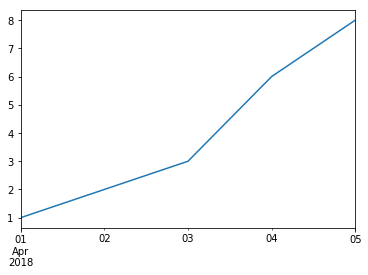

In [63]:
values = pd.Series([1.0, 2.0, 3.0, 6.0, 8.0], index=dates)
values.plot()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


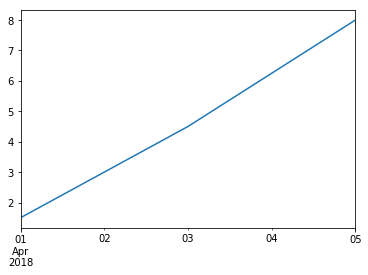

In [64]:
values.resample('2d').plot()

In [71]:
values.resample('3h').head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


2018-04-01 00:00:00    1.0
2018-04-01 03:00:00    NaN
2018-04-01 06:00:00    NaN
2018-04-01 09:00:00    NaN
2018-04-01 12:00:00    NaN
Freq: 3H, dtype: float64

So many NaN right, because we just upsampled the series and we need to do extra work to fill in the gaps.

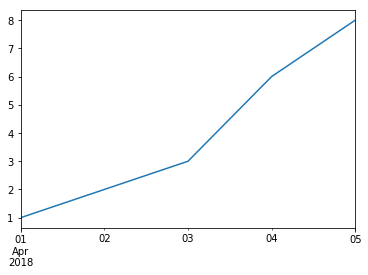

In [73]:
values = values.interpolate()
values.plot()

# Data Frame
A data frame is just like a 2D table, which consist of multiple columns. To create a data frame,

In [86]:
genders = ['M', 'F', 'M', 'M', 'F']
names = ['Tom', 'Ann', 'John', 'Peter', 'Ella']
depts = ['CS', 'Art', 'CS', 'Phy', 'CS']
student_ids = ['A1001','A1002','A1005','A1006', 'A1008']
students = pd.DataFrame(data={'gender': genders, 'names': names, 'dept': depts}, index=student_ids)
students

,dept,gender,names
A1001,CS,M,Tom
A1002,Art,F,Ann
A1005,CS,M,John
A1006,Phy,M,Peter
A1008,CS,F,Ella


Now we can query the dataframe via checking column values, for example

In [88]:
students[students['gender'] == 'M']

,dept,gender,names
A1001,CS,M,Tom
A1005,CS,M,John
A1006,Phy,M,Peter


In [95]:
students[(students['gender'] == 'M') & (students['dept'] == 'CS')]

,dept,gender,names
A1001,CS,M,Tom
A1005,CS,M,John


In [97]:
students.loc['A1001']

dept       CS
gender      M
names     Tom
Name: A1001, dtype: object

You can also select few particular columns

In [99]:
students[["gender", "dept"]]

,gender,dept
A1001,M,CS
A1002,F,Art
A1005,M,CS
A1006,M,Phy
A1008,F,CS


# Group by & Aggregation

In [114]:
dept_count  = students.groupby(['dept'])['dept'].agg({'dept': 'count'}).rename('count')
dept_count = dept_count.reset_index('dept')

TypeError: 'str' object is not callable